##**Nuclei segmentation using StarDist**

### 1. Segmentation using pretrained model

In [16]:
#install stardist
!pip install stardist
!pip install numpy==1.26.4

In [17]:
#mounting google drive (location of averaged tif images)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#importing packages
from skimage import io
from stardist.models import StarDist2D
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from stardist import export_imagej_rois
from csbdeep.utils import normalize
import matplotlib.pyplot as plt
from google.colab import files

In [19]:
# Define a pretrained model to segment nuclei in fluorescence images (download from pretrained)
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [20]:
my_fl_img = io.imread("/content/drive/MyDrive/AVG_1_trace_cor.tif", as_gray=True)
my_fl_labels, my_fl_details = model.predict_instances(normalize(my_fl_img))

functional.py (237): The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(1, 256, 512, 1))


Text(0.5, 1.0, 'prediction + input overlay')

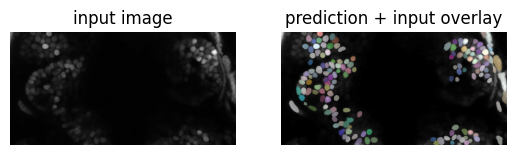

In [21]:
plt.subplot(1,2,1)
plt.imshow(my_fl_img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(my_fl_labels, img=my_fl_img))
plt.axis("off")
plt.title("prediction + input overlay")
#posibly save as tif to check labeling

In [22]:
export_imagej_rois('img_rois.zip', my_fl_details['coord'])
files.download('img_rois.zip')
#load the zip file directly into roi manager.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. Investing the Results

Text(0.5, 1.0, 'prediction + input overlay')

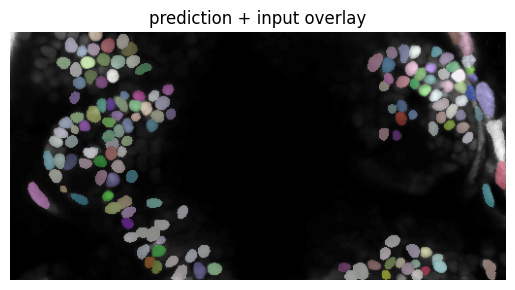

In [23]:
plt.subplot()
plt.imshow(render_label(my_fl_labels, img=my_fl_img))
plt.axis("off")
plt.title("prediction + input overlay")
#posibly save as tif to check labeling

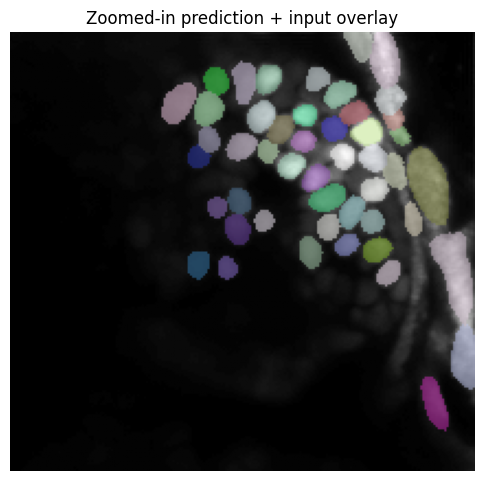

In [24]:
# prompt: i want to plot a zoomed in version of the img=my_fl_img with prediction overlay

# Choose a region to zoom in on (e.g., top-right corner)
y_min, y_max = 0, 200
x_min, x_max = 300, 512

plt.figure(figsize=(6, 6))
plt.imshow(render_label(my_fl_labels[y_min:y_max, x_min:x_max], img=my_fl_img[y_min:y_max, x_min:x_max]))
plt.axis("off")
plt.title("Zoomed-in prediction + input overlay")
plt.show()

Problem: Some non nuclear structures are also labelled as Nuclei

Solution: Train model with self annotated data

### 3. Training Model with Self-Annoted data